<a href="https://colab.research.google.com/github/abrown12005/CMP_SC-4540-HW/blob/main/HW4/Random_VariableandNoice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this colab we will cover 5 different types of Random Variable Distributions, as well as 3 types of random noises

## We will start with Random Variable Distributions, with the first being the Bernoulli Distribution

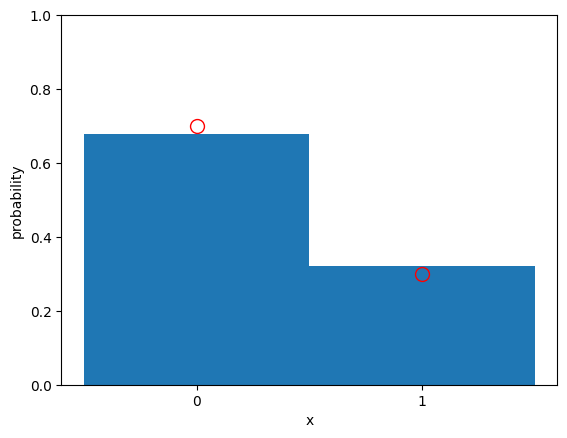

In [ ]:
import numpy as np
import scipy.stats as st
import scipy.signal as signal
import matplotlib.pyplot as plt

dist_bernoulli = st.bernoulli
p = 0.3
x = dist_bernoulli.rvs(p, size=1000)
xs = np.array([0, 1])
pmf_bernoulli = dist_bernoulli.pmf(xs, p)

plt.figure()
plt.hist(x, bins=xs.size, range=(xs[0]-.5, xs[-1]+.5), density=True)
plt.plot(xs, pmf_bernoulli, 'ro', markersize=10, markerfacecolor='None')

plt.xticks(xs)
plt.ylim([0, 1])
plt.xlabel('x')
plt.ylabel('probability')
plt.show()

Because the Bernoulli Distribution is a descrete random variable distribution, the probability mass function is simple dots on the histogram.

It follows the following equation
\begin{cases}
      p  & \text{if} & x= 1 \\
      1 - p & \text{if} & x=0 \\
\end{cases}
Where p is the probability of x event happening

**Now we will look at the uniform distribution**

<Figure size 640x480 with 0 Axes>

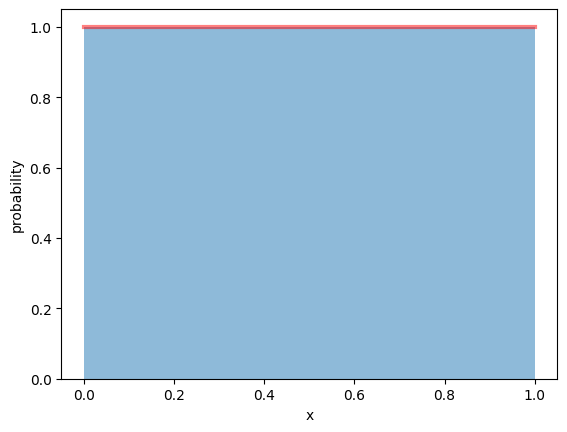

<Figure size 640x480 with 0 Axes>

In [ ]:
uniform = st.uniform
x = uniform.rvs(size=1)
fig, ax = plt.subplots(1, 1)

x = np.linspace(uniform.ppf(0),
                uniform.ppf(1), 3)
ax.plot(x, uniform.pdf(x),
       'r-', lw=3, alpha=0.5, label='uniform pdf')

ax.hist(x, density=True, bins='auto', histtype='stepfilled', alpha=0.5)
plt.xlabel('x')
plt.ylabel('probability')
plt.figure()

The uniform distribution is a continuous function in which the probability of a certian event happening is a constant/uniform chance (given by the flat tops of the rectangles)

The equation is as below:
\begin{equation}
      \frac{1}{b - a}\\
      \text{in range [a,b]}\\
\end{equation}

**Next is the Poisson Distribution**

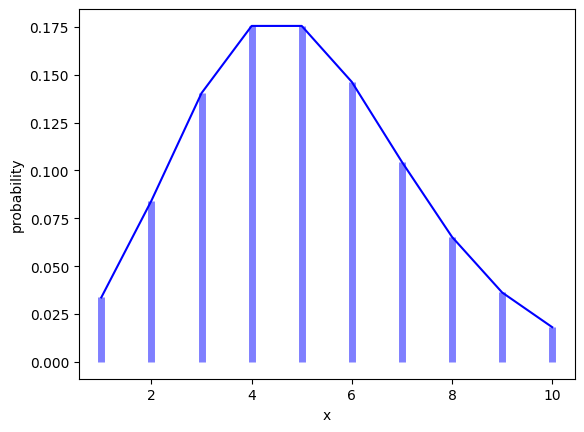

In [ ]:
poisson = st.poisson
fig, ax = plt.subplots(1, 1)

mu = 5
lb, ub = poisson.support(mu)
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
x = np.arange(poisson.ppf(0.01, mu),
              poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'b', ms=5, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
plt.xlabel('x')
plt.ylabel('probability')
plt.show()

The Poisson Distribution is a discrete function that follows the given equation
\begin{equation}
      \frac{e^{-k}k^x}{x!}\\
\end{equation}
Where k is the number of occurrences and x is a discrete number  (0,1,2...)

Some sites replace k with λ and replace x with k, however they all still have the same meaning

**Now we will look at the Gaussian Distribution**

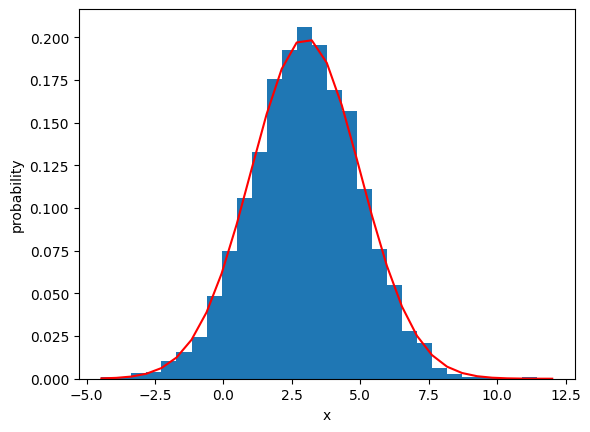

In [ ]:
norm = st.norm
mu, sigma = 3, 2
x = norm.rvs(loc=mu, scale=sigma, size=5000)

_ , xs, _ = plt.hist(x, bins=30, density=True)

pdf = norm.pdf(xs, loc=mu, scale=sigma)
plt.plot(xs, pdf, 'r')

plt.xlabel('x')
plt.ylabel('probability')
plt.show()

The Gaussian/Normal Distribution is a continuous function that follows the following formula
\begin{equation}
      \frac{1}{\sigma\sqrt{2π}}
      *e^{\frac{1}{2}(\frac{x-\mu}{\sigma})^2}\\
\end{equation}

Where σ is the standard deviation and μ is the mean of the data set

**The last Random Variable Distribution we will look at is the log_Norm**

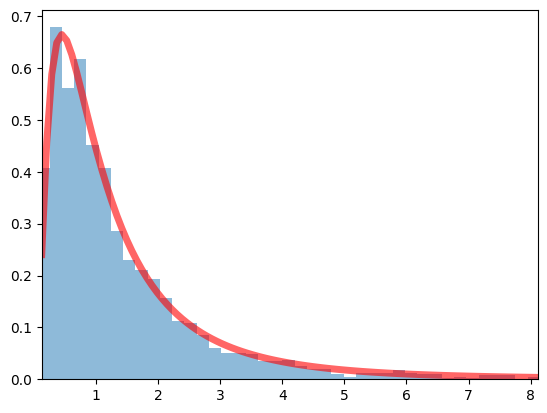

In [ ]:
lognorm = st.lognorm
fig, ax = plt.subplots(1, 1)

s = 0.9
r = lognorm.rvs(s, size=2000)
lb, ub = lognorm.support(s)

mean, var, skew, kurt = lognorm.stats(s, moments='mvsk')

x = np.linspace(lognorm.ppf(0.01, s),
                lognorm.ppf(0.99, s), 100)

ax.plot(x, lognorm.pdf(x, s),
       'r-', lw=5, alpha=0.6, label='lognorm pdf')

ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.5)
ax.set_xlim([x[0], x[-1]])
#ax.legend(loc='best', frameon=False)
plt.show()

The log_Norm Distribution is a continuous random variable function following the equation below

\begin{equation}
      \frac{1}{sx\sqrt{2π}}
      *e^{(-\frac{log^2(x)}{2s^2})}\\
\end{equation}

Where s is the standard deviation with a scale of e^(mean). Or relating to the Normal Distribution, s = σ and scale = e^μ

## Now we will start to cover several types of Noises, starting with White Noise

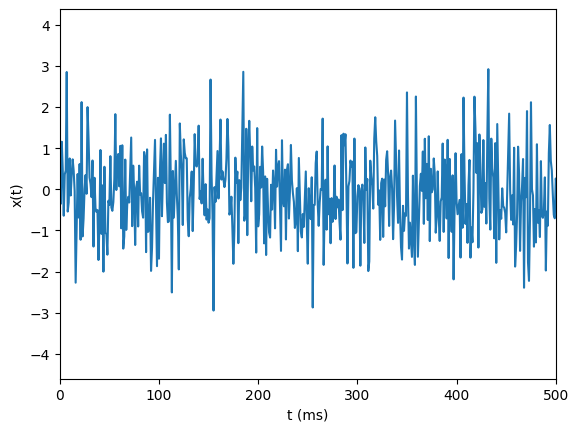

In [ ]:
fs = 1000
N = 10000
t = np.arange(N) / fs * 1000

white_noise = norm.rvs(size=N)

plt.figure()
plt.plot(t, white_noise)
plt.xlim([0, 500])
plt.xlabel('t (ms)')
plt.ylabel('x(t)')
plt.show()

White noise is based off of a Normal Distribution with the data centered at a mean of 0

**Next is Brownian/Random walk Noise**

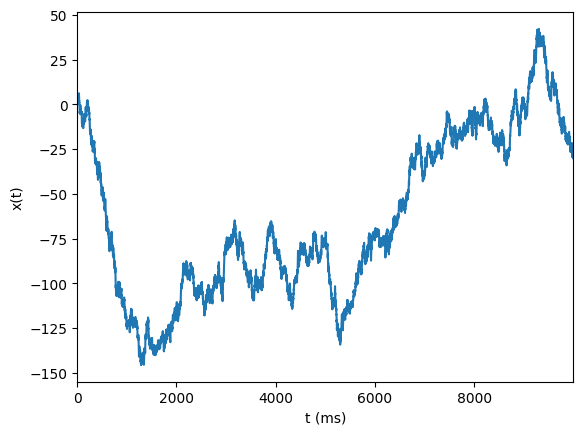

In [ ]:
brownian_noise = np.cumsum(white_noise)

plt.figure()
plt.plot(t, brownian_noise)
plt.xlim(t[[0, -1]])
plt.xlabel('t (ms)')
plt.ylabel('x(t)')
plt.show()

Brownian noise comes from integrating white noise. The drifting comes from the fact that we are integrating a random function, which creates no concrete mean for the noise to vary around.

**The last noise is Pink noise**

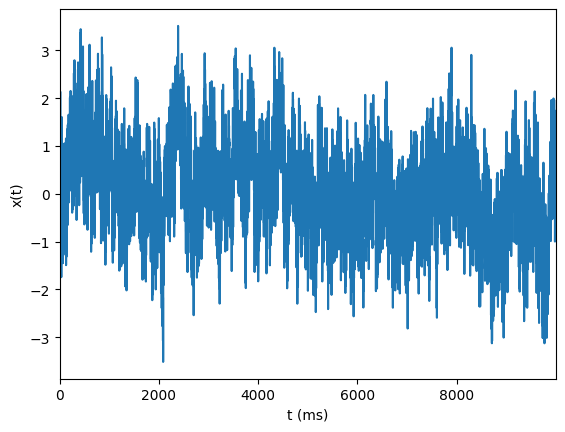

In [ ]:
%pip install colorednoise

import colorednoise as cn
beta = 1
pink_noise = cn.powerlaw_psd_gaussian(beta, N)

plt.figure()
plt.plot(t, pink_noise)
plt.xlim(t[[0, -1]])
plt.xlabel('t (ms)')
plt.ylabel('x(t)')
plt.show()

Pink noise is a low frequency that comes from many sources such as heart beats and from outerspace.